<a href="https://colab.research.google.com/github/TexasInstruments/edgeai-tidl-tools/blob/master/examples/jupyter_notebooks/colab/tidlrt_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the x86_64 tools required for model compilation of given target release version


In [12]:
!wget https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
!tar -xzf tidl_tools.tar.gz
!rm tidl_tools.tar.gz

--2023-10-02 12:51:00--  https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
Resolving software-dl.ti.com (software-dl.ti.com)... 23.75.39.140, 2600:1406:3c00:499::b48, 2600:1406:3c00:496::b48
Connecting to software-dl.ti.com (software-dl.ti.com)|23.75.39.140|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.ti.com/general/docs/licreg/anonymousproddownload.tsp?downloadPage=true&location=https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz [following]
--2023-10-02 12:51:00--  https://www.ti.com/general/docs/licreg/anonymousproddownload.tsp?downloadPage=true&location=https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
Resolving www.ti.com (www.ti.com)... 23.75.39.140, 2600:1406:3c00:188::b48, 2600:1406:3c00:186::b48
Connecting to www.ti.com (www.ti.com)|23.75.39.140|:443... connected.
HTTP request 

# Downloading a sample model (renet18.onnx) and an image for testing

In [13]:
!wget https://akm-img-a-in.tosshub.com/indiatoday/images/story/201804/jet.jpeg
!wget https://git.ti.com/cgit/jacinto-ai/jacinto-ai-modelzoo/plain/models/vision/classification/imagenet1k/torchvision/resnet18_opset9.onnx
!mkdir /content/resnet18/
!mv jet.jpeg /content/resnet18/

--2023-10-02 12:51:05--  https://akm-img-a-in.tosshub.com/indiatoday/images/story/201804/jet.jpeg
Resolving akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)... 23.217.118.47, 23.217.118.65, 2600:1406:3c::6863:ee2a, ...
Connecting to akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)|23.217.118.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30622 (30K) [image/jpeg]
Saving to: ‘jet.jpeg’

jet.jpeg            100%[===================>]  29.90K  --.-KB/s    in 0s      

2023-10-02 12:51:05 (330 MB/s) - ‘jet.jpeg’ saved [30622/30622]

--2023-10-02 12:51:05--  https://git.ti.com/cgit/jacinto-ai/jacinto-ai-modelzoo/plain/models/vision/classification/imagenet1k/torchvision/resnet18_opset9.onnx
Resolving git.ti.com (git.ti.com)... 198.47.28.207
Connecting to git.ti.com (git.ti.com)|198.47.28.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46808064 (45M) [application/octet-stream]
Saving to: ‘resnet18_opset9.onnx’

resnet18_opset9.o

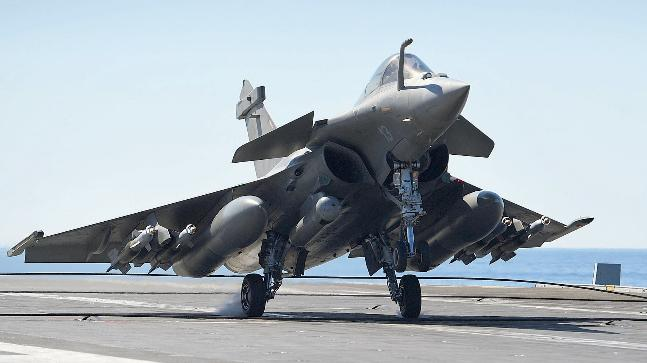

In [22]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/resnet18/*.jpeg'):
    display(Image(filename=imageName))

# Preparing configuration text files and list of inputs for quantization/calibration

In [16]:
!echo "perfSimConfig = /content/tidl_tools/device_config.cfg" >> /content/resnet18/config
!echo "/content/resnet18/jet.jpeg 895" >> /content/resnet18/in_data_list.txt

# Model import/compilation to generate artifacts for model inference on device

In [17]:
!/content/tidl_tools/tidl_model_import.out /content/resnet18/config --modelType 2 \
--inputNetFile /content/resnet18_opset9.onnx --outputNetFile /content/resnet18/tidl_net.bin \
--outputParamsFile /content/resnet18/tidl_io_buff  --inDataNorm 1 \
--inMean 123.675 116.28 103.53  --inScale 0.017125 0.017507 0.017429 \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--tidlStatsTool /content/tidl_tools/PC_dsp_test_dl_algo.out \
--perfSimTool /content/tidl_tools/ti_cnnperfsim.out \
--graphVizTool /content/tidl_tools/tidl_graphVisualiser.out \
--inHeight 224 --inWidth 224 --inNumChannels 3 --numFrames 1


ONNX Model (Proto) File  : /content/resnet18_opset9.onnx  
TIDL Network File      : /content/resnet18/tidl_net.bin  
TIDL IO Info File      : /content/resnet18/tidl_io_buff  
Current ONNX OpSet Version   : 9  
Empty prototxt path, running calibration

~~~~~Running TIDL in PC emulation mode to collect Activations range for each layer~~~~~

Processing config file #0 : /content/resnet18/config.qunat_stats_config.txt 
 Freeing memory for user provided Net
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . .. T    8317.90  .... ..... ... .... .....
 
 
 *****************   Calibration iteration number 0 started ************************ 
 
 
 

~~~~~Running TIDL in PC emulation mode to collect Activations range for each layer~~~~~

Processing config file #0 : /content/resnet18/config.qunat_stats_config.txt 
 Freeing memory for user provided Net
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . .. T    6048.46 

# Running inference of the imported model artefacts using PC Host emulation mode.
Here last number is index of the  detected object in the ImageNet [categories/labels](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for the given input image

895: 'warplane, military plane


In [18]:
!/content/tidl_tools/PC_dsp_test_dl_algo.out s:/content/resnet18/config \
--netBinFile /content/resnet18/tidl_net.bin \
--ioConfigFile /content/resnet18/tidl_io_buff1.bin \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--outData /content/resnet18/jet_tidl_out.bin --postProcType 1


Processing config file #0 : /content/resnet18/config 
 Freeing memory for user provided Net
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . .. T    1645.87  .... ..... ...
 A :   895, 1.0000, 1.0000,   895 .... .....

# The generated model artefacts, in this case "resnet18" directory can be copied to EVM board file-system (/opt/ directory) to run the inference on the device using below commands


```
root@ j7-evm:~# cd /opt/vision_apps
root@ j7-evm:~# source ./vision_apps_init.sh
root@ j7-evm:~# cd /opt/tidl_test
root@ j7-evm:/opt/tidl_test# export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/lib
root@ j7-evm:~# echo "/opt/resnet18/jet.jpeg 895" > /opt/resnet18/in_data_list.txt
root@ j7-evm:/opt/tidl_test# ./TI_DEVICE_a72_test_dl_algo_host_rt.out s:/opt/resnet18/config \
--netBinFile /opt/resnet18/tidl_net.bin \
--ioConfigFile /opt/resnet18/tidl_io_buff1.bin \
--inData /opt/resnet18/in_data_list.txt --inFileFormat 2 \
--outData /opt/resnet18/jet_tidl_out.bin --postProcType 1
```







# SVG file in the artefacts folder can be used to visualize the import model structure with more details

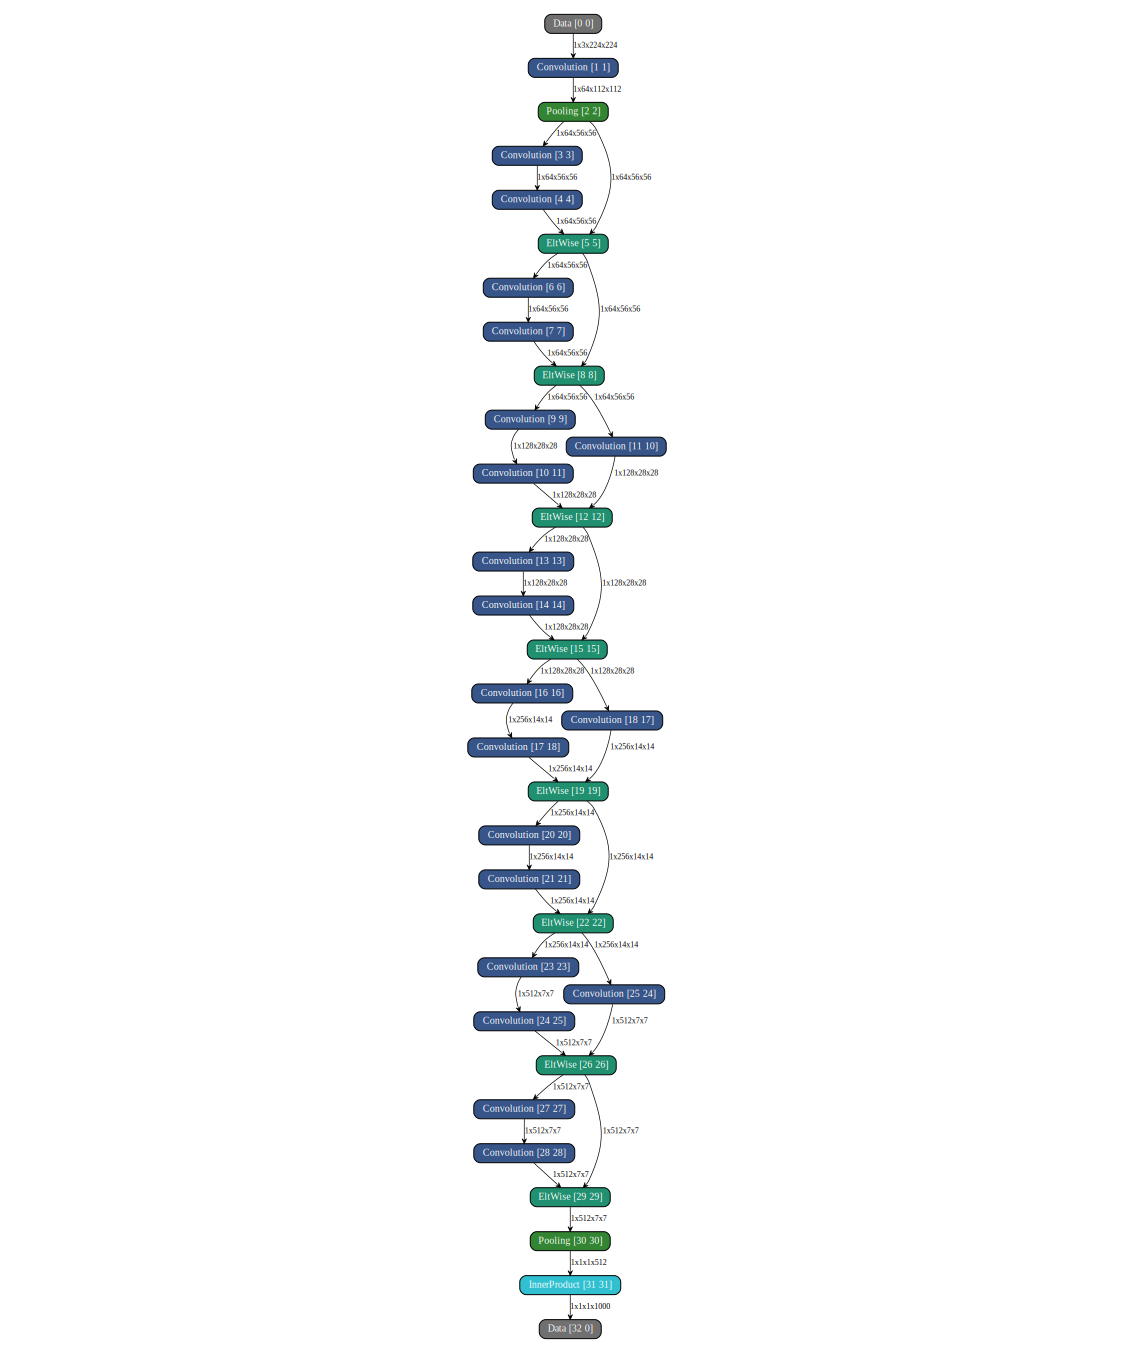

In [19]:
from IPython.display import SVG, display
display(SVG(filename="/content/resnet18/tidl_net.bin.svg"))